In [38]:
import simpy
import random
import matplotlib.pyplot as plt

In [43]:
TIEMPO_SIMULACION = 100
TASA_LLEGADAS = 1/5      # una llegada cada 5 unidades de tiempo
TASA_SERVICIO = 1/4      # el servidor atiende en promedio cada 4 unidades de tiempo

# Variables para análisis
tiempos_espera = []

In [44]:
def cliente(env, nombre, servidor):
    llegada = env.now
    print(f"{nombre} llega en el tiempo {llegada:.2f}")
    
    with servidor.request() as req:
        yield req
        espera = env.now - llegada
        if espera:
            tiempos_espera.append(espera)
        else:
            print(f"{nombre} empieza a ser atendido en {env.now:.2f} (esperó {espera:.2f})")
        
        tiempo_servicio = random.expovariate(TASA_SERVICIO)
        yield env.timeout(tiempo_servicio)
        print(f"{nombre} termina en {env.now:.2f}")

In [45]:
def generador_clientes(env, servidor):
    i = 0
    while True:
        yield env.timeout(random.expovariate(TASA_LLEGADAS))
        i += 1
        env.process(cliente(env, f"Cliente {i}", servidor))


Cliente 1 llega en el tiempo 2.44
Cliente 1 empieza a ser atendido en 2.44 (esperó 0.00)
Cliente 1 termina en 2.90
Cliente 2 llega en el tiempo 6.01
Cliente 2 empieza a ser atendido en 6.01 (esperó 0.00)
Cliente 3 llega en el tiempo 7.00
Cliente 2 termina en 8.36
Cliente 3 termina en 11.44
Cliente 4 llega en el tiempo 17.68
Cliente 4 empieza a ser atendido en 17.68 (esperó 0.00)
Cliente 5 llega en el tiempo 18.52
Cliente 6 llega en el tiempo 19.00
Cliente 4 termina en 23.36
Cliente 7 llega en el tiempo 23.99
Cliente 8 llega en el tiempo 25.42
Cliente 5 termina en 26.10
Cliente 6 termina en 27.22
Cliente 9 llega en el tiempo 31.84
Cliente 10 llega en el tiempo 32.66
Cliente 7 termina en 35.63
Cliente 8 termina en 40.77
Cliente 11 llega en el tiempo 41.03
Cliente 12 llega en el tiempo 42.27
Cliente 9 termina en 42.73
Cliente 10 termina en 46.02
Cliente 11 termina en 46.42
Cliente 12 termina en 47.67
Cliente 13 llega en el tiempo 48.09
Cliente 13 empieza a ser atendido en 48.09 (esperó 0.

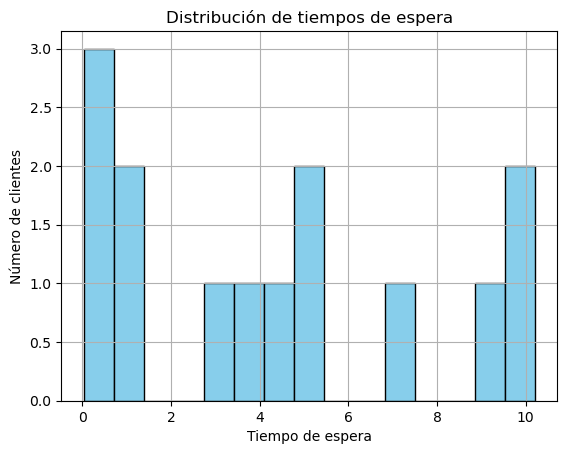


Clientes atendidos: 14
Tiempo promedio de espera: 4.33 unidades de tiempo


In [46]:
# Crear entorno de simulación
env = simpy.Environment()
servidor = simpy.Resource(env, capacity=1)
env.process(generador_clientes(env, servidor))
env.run(until=TIEMPO_SIMULACION)

# Mostrar resultados
plt.hist(tiempos_espera, bins=15, color='skyblue', edgecolor='black')
plt.title("Distribución de tiempos de espera")
plt.xlabel("Tiempo de espera")
plt.ylabel("Número de clientes")
plt.grid(True)
plt.show()

# Estadísticas
print(f"\nClientes atendidos: {len(tiempos_espera)}")
print(f"Tiempo promedio de espera: {sum(tiempos_espera)/len(tiempos_espera):.2f} unidades de tiempo")